# Gradient Boost Implementation in Python

## Gradient Boost Definition

### What is Gradient Boosting?

Gradient Boosting is an ensemble machine learning technique that combines the predictions of several base models (typically decision trees) to produce a more accurate and robust model. The "boosting" part refers to the way these models are built sequentially, each one trying to correct the errors of the previous one.

### Key Concepts

1. **Ensemble Learning**: Combining the predictions of multiple models to improve the overall performance. Gradient boosting is a type of ensemble learning.

2. **Boosting**: A sequential technique where each new model is trained to correct the errors made by the previous models.

3. **Gradient Descent**: An optimization algorithm used to minimize the error by adjusting the model parameters. In gradient boosting, gradient descent is used to minimize the loss function.




### Steps in Gradient Boosting

1. **Initialization**: Start with an initial prediction. This could be as simple as predicting the mean value of the target variable for regression problems.

2. **Calculate Residuals**: Compute the difference between the actual values and the predicted values. These differences are called residuals.

3. **Train Weak Learner**: Train a new model (often a decision tree) on the residuals. The goal is for this new model to predict the residuals.

4. **Update Predictions**: Add the predictions from the new model to the previous predictions to get the updated predictions.

5. **Repeat**: Repeat steps 2-4 for a specified number of iterations or until the model performance stops improving.



### Example: Gradient Boosting for Regression

Going through a simple example to illustrate the process:

#### Step 1: Initialization

Suppose we have a dataset with features $(X)$ and target variable $(y)$. We start with an initial prediction $( \hat{y}_0 )$, which could be the mean of \( y \).

$[ \hat{y}_0 = \frac{1}{n} \sum_{i=1}^{n} y_i ]$

#### Step 2: Calculate Residuals

Calculate the residuals (errors) for each instance in the dataset.

$[ r_i = y_i - \hat{y}_0 ]$

#### Step 3: Train Weak Learner

Train a decision tree on the residuals $( r )$. The decision tree will learn to predict the residuals.

#### Step 4: Update Predictions

Update the predictions by adding the predictions from the decision tree to the initial predictions.

$[ \hat{y}_1 = \hat{y}_0 + \text{tree}_1(X) ]$

#### Step 5: Repeat

Repeat steps 2-4 for a specified number of iterations. Each iteration adds another decision tree that corrects the errors of the previous ensemble.

### Gradient Boosting Parameters

1. **Number of Trees (n_estimators)**: The number of decision trees to be added. More trees can improve accuracy but also increase computation time and risk overfitting.

2. **Learning Rate**: A scaling factor applied to each tree's contribution. Lower values make the model more robust to overfitting but require more trees.

3. **Tree Depth**: Controls the complexity of each decision tree. Deeper trees can capture more information but also risk overfitting.

### Popular Gradient Boosting Libraries

1. **XGBoost**: An optimized gradient boosting library that is efficient and highly scalable.
2. **LightGBM**: A gradient boosting framework that uses tree-based learning algorithms, designed to be efficient and fast.
3. **CatBoost**: A gradient boosting library that handles categorical features well and is known for its ease of use.


### Implementing GradientBoost Algorithm in Python

In [13]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

#### Data Preparation

In [14]:
california  = fetch_california_housing()
X = pd.DataFrame(california.data, columns = california.feature_names)#independent columns
#Dependent column
y = pd.Series(california.target)#Median value of house

In [15]:
# Viewing Data
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
y[1:10]

1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
dtype: float64

#### Splitting Dataset, Test and Train Set

In [17]:
#Here we have 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#### Training the Model and Evaluation

In [18]:
# Creating gradientboost regressor object
gradientregressor = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0)

 Here we have two important parameters:
 - n_estimators: Number of weak learners to train iteratively 
 - learning_rate = It contributes to the weights of weak learners. It uses `1` as a default value.

In [19]:
# Training gradient boost regressor
model = gradientregressor.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = model.predict(X_test)

In [20]:
r2_score(y_pred, y_test)

0.2527760017373841

In [21]:
#Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

TypeError: only integer scalar arrays can be converted to a scalar index

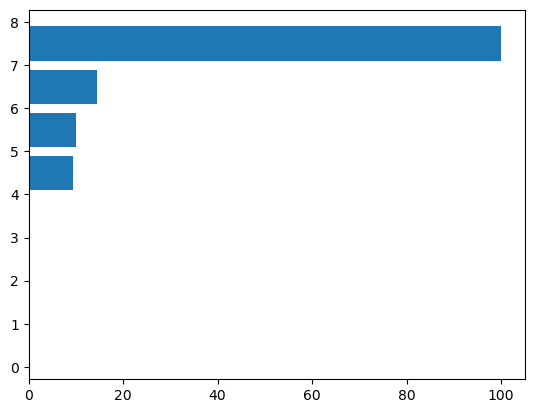

In [34]:
#plotting feature importance
feature_importance = model.feature_importances_

#making importance relative to max_importance
feature_importance = 100.0 * (feature_importance/ feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, california.feature_names[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Importance of the Variables")
plt.show()